<a href="https://colab.research.google.com/github/parkingim/AI-python/blob/main/20250516_%EB%B0%95%EC%A4%91%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pandas

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('/content/example_data.csv')

In [6]:
df

,학번,이름,학년,점수,분반,공부시간
0,1,신사임당,NaN,69,B,4
1,2,홍길동,1.0,92,B,3
2,3,강감찬,4.0,91,C,20
3,4,강감찬,2.0,70,C,5
4,5,강감찬,3.0,83,C,5
5,6,이순신,4.0,95,A,0
6,7,강감찬,4.0,71,C,1
7,8,김유신,NaN,88,B,5
8,9,신사임당,3.0,94,A,9
9,10,홍길동,NaN,60,B,3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학번      21 non-null     int64  
 1   이름      18 non-null     object 
 2   학년      18 non-null     float64
 3   점수      21 non-null     int64  
 4   분반      21 non-null     object 
 5   공부시간    21 non-null     int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.1+ KB


In [8]:
df.describe()

,학번,학년,점수,공부시간
count,21.000000,18.000000,21.000000,21.000000
mean,10.952381,2.777778,90.523810,4.333333
std,6.127611,1.165966,38.647922,5.650959
min,1.000000,1.000000,60.000000,0.000000
25%,6.000000,2.000000,69.000000,1.000000
50%,11.000000,3.000000,83.000000,3.000000
75%,16.000000,4.000000,94.000000,5.000000
max,20.000000,4.000000,200.000000,20.000000


In [9]:
df.isnull().sum()

,0
학번,0
이름,3
학년,3
점수,0
분반,0
공부시간,0


In [10]:
df=df.dropna()

In [11]:
df.isnull().sum()

,0
학번,0
이름,0
학년,0
점수,0
분반,0
공부시간,0


In [12]:
df.query('점수 > 100 or 공부시간 > 10')

,학번,이름,학년,점수,분반,공부시간
2,3,강감찬,4.0,91,C,20
11,12,신사임당,2.0,96,A,20
18,19,이순신,1.0,200,A,3


In [13]:
outlier_df = df[(df['점수'] > 100) | (df['공부시간'] > 10)]

In [14]:
df.duplicated()

,0
1,False
2,False
3,False
4,False
5,False
6,False
8,False
11,False
12,False
14,False


In [15]:
df = df.drop_duplicates()
print(df)

    학번    이름   학년   점수 분반  공부시간
1    2   홍길동  1.0   92  B     3
2    3   강감찬  4.0   91  C    20
3    4   강감찬  2.0   70  C     5
4    5   강감찬  3.0   83  C     5
5    6   이순신  4.0   95  A     0
6    7   강감찬  4.0   71  C     1
8    9  신사임당  3.0   94  A     9
11  12  신사임당  2.0   96  A    20
12  13   김유신  4.0   65  A     0
14  15   홍길동  4.0   77  A     2
15  16   이순신  4.0   75  A     4
17  18   홍길동  4.0   91  A     0
18  19   이순신  1.0  200  A     3
19  20  신사임당  2.0   61  A     2


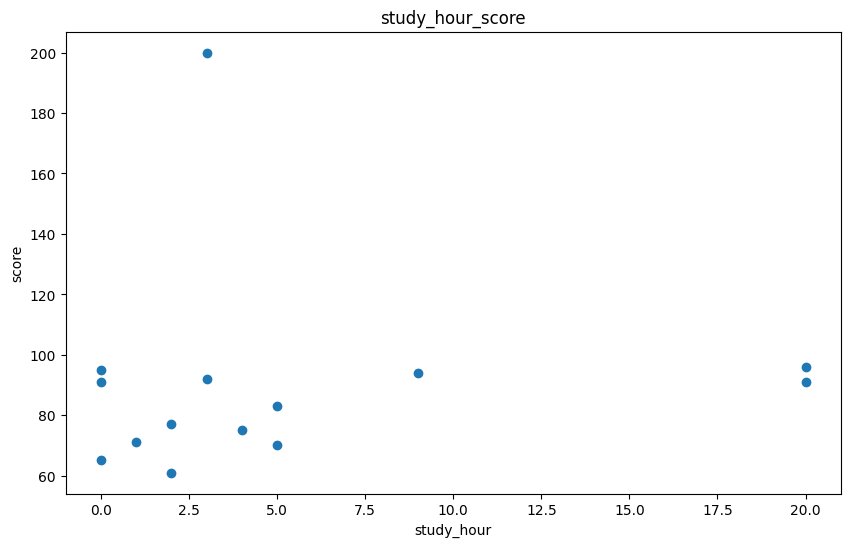

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.scatter(df['공부시간'], df['점수'])
plt.xlabel('study_hour')
plt.ylabel('score')
plt.title('study_hour_score')
plt.show()

In [17]:
q1_score = df['점수'].quantile(0.25)
q3_score = df['점수'].quantile(0.75)
IQR_score = q3_score - q1_score

In [18]:
lower_bound_score = q1_score - 1.5 * IQR_score
upper_bound_score = q3_score + 1.5 * IQR_score

In [19]:
score_outliers = df[(df['점수'] < lower_bound_score) | (df['점수'] > upper_bound_score)]

In [20]:
q1_study = df['공부시간'].quantile(0.25)
q3_study = df['공부시간'].quantile(0.75)
IQR_study = q3_study - q1_study

In [21]:
lower_bound_study = q1_study - 1.5 * IQR_study
upper_bound_study = q3_study + 1.5 * IQR_study

In [23]:
study_outlier = df[(df['공부시간'] < lower_bound_study) | (df['공부시간'] > upper_bound_study)]
print(study_outlier)

    학번    이름   학년  점수 분반  공부시간
2    3   강감찬  4.0  91  C    20
11  12  신사임당  2.0  96  A    20


In [24]:
df_no_outliers = df[(df['점수'] >= lower_bound_score) & (df['점수'] <= upper_bound_score) & (df['공부시간'] >= lower_bound_study) & (df['공부시간'] <= upper_bound_study)]

In [25]:
df_no_outliers = df_no_outliers.reset_index(drop=True)
print('이상치가 제거된 데이터프레임')
print(df_no_outliers)

이상치가 제거된 데이터프레임
    학번    이름   학년  점수 분반  공부시간
0    2   홍길동  1.0  92  B     3
1    4   강감찬  2.0  70  C     5
2    5   강감찬  3.0  83  C     5
3    6   이순신  4.0  95  A     0
4    7   강감찬  4.0  71  C     1
5    9  신사임당  3.0  94  A     9
6   13   김유신  4.0  65  A     0
7   15   홍길동  4.0  77  A     2
8   16   이순신  4.0  75  A     4
9   18   홍길동  4.0  91  A     0
10  20  신사임당  2.0  61  A     2


In [26]:
print('문제11. 분반별 점수 평균 계산')
class_means = df_no_outliers.groupby('분반')['점수'].mean()
print(class_means)

문제11. 분반별 점수 평균 계산
분반
A    79.714286
B    92.000000
C    74.666667
Name: 점수, dtype: float64


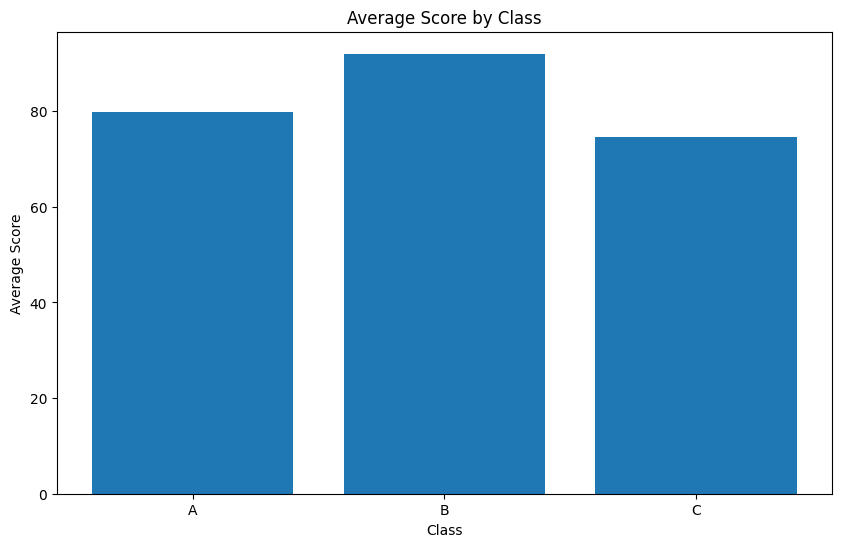

In [27]:
plt.figure(figsize=(10, 6))
plt.bar(class_means.index, class_means.values)
plt.xlabel('Class')
plt.ylabel('Average Score')
plt.title('Average Score by Class')
plt.show()